 # Factors Influencing High School Students' Academic Performance
 
This report examines the factors influencing high school students' academic performance using a dataset of students, detailing their demographics, study habits, parental involvement, and extracurricular activities. It explores how these variables, including weekly study time, absences, tutoring, parental support, and participation in sports, music, and volunteering, correlate with students' Grade Point Averages (GPA) and their classification into grade categories (A to F). The analysis aims to provide insights for educators and policymakers to develop targeted strategies to enhance academic success.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

## Load, Understand, Explore, and Analyze the Data

- Load the data
- Display the first five (5) rows

In [2]:
# Dataset URL
dataset_url = "https://raw.githubusercontent.com/cogxen/datasets/main/student-performance/student-performance.csv"

# Load the data
students = pd.read_csv(dataset_url)

# Display the first five rows
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


- Display the shape of the DataFrame

In [3]:
students.shape

(2392, 15)

- Display DataFrame's data types 

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


- Display DataFrame's statistical summary

In [5]:
students.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


- Conduct a null value inspection of the DataFrame

In [6]:
students.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Data Visualization I

### Exploring Data Distributions

To gain a better understanding of the data, we visualized the distribution of each variable. This helps to identify patterns, anomalies, and potential insights within the dataset.

- Define a function creating a plot distribution

In [7]:
def distribution(dataframe, columns, cols=3, width=20, height=5, hspace=0.45, wspace=0.5):
    plt.style.use('seaborn-v0_8-whitegrid')
    num_plots = math.ceil(float(len(columns)) / cols)
    
    for i in range(0, len(columns), cols):
        fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(width, height))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
        subset = columns[i:i+cols]
        
        for j, column in enumerate(subset):
            ax = axes[j]
            ax.set_title(column)
            sns.histplot(dataframe[column], kde=True, ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
        
        # Remove empty subplots
        for k in range(len(subset), cols):
            fig.delaxes(axes[k])
        
        plt.tight_layout()
        plt.show()

- [`Age`, `Gender`, `Ethnicity`]

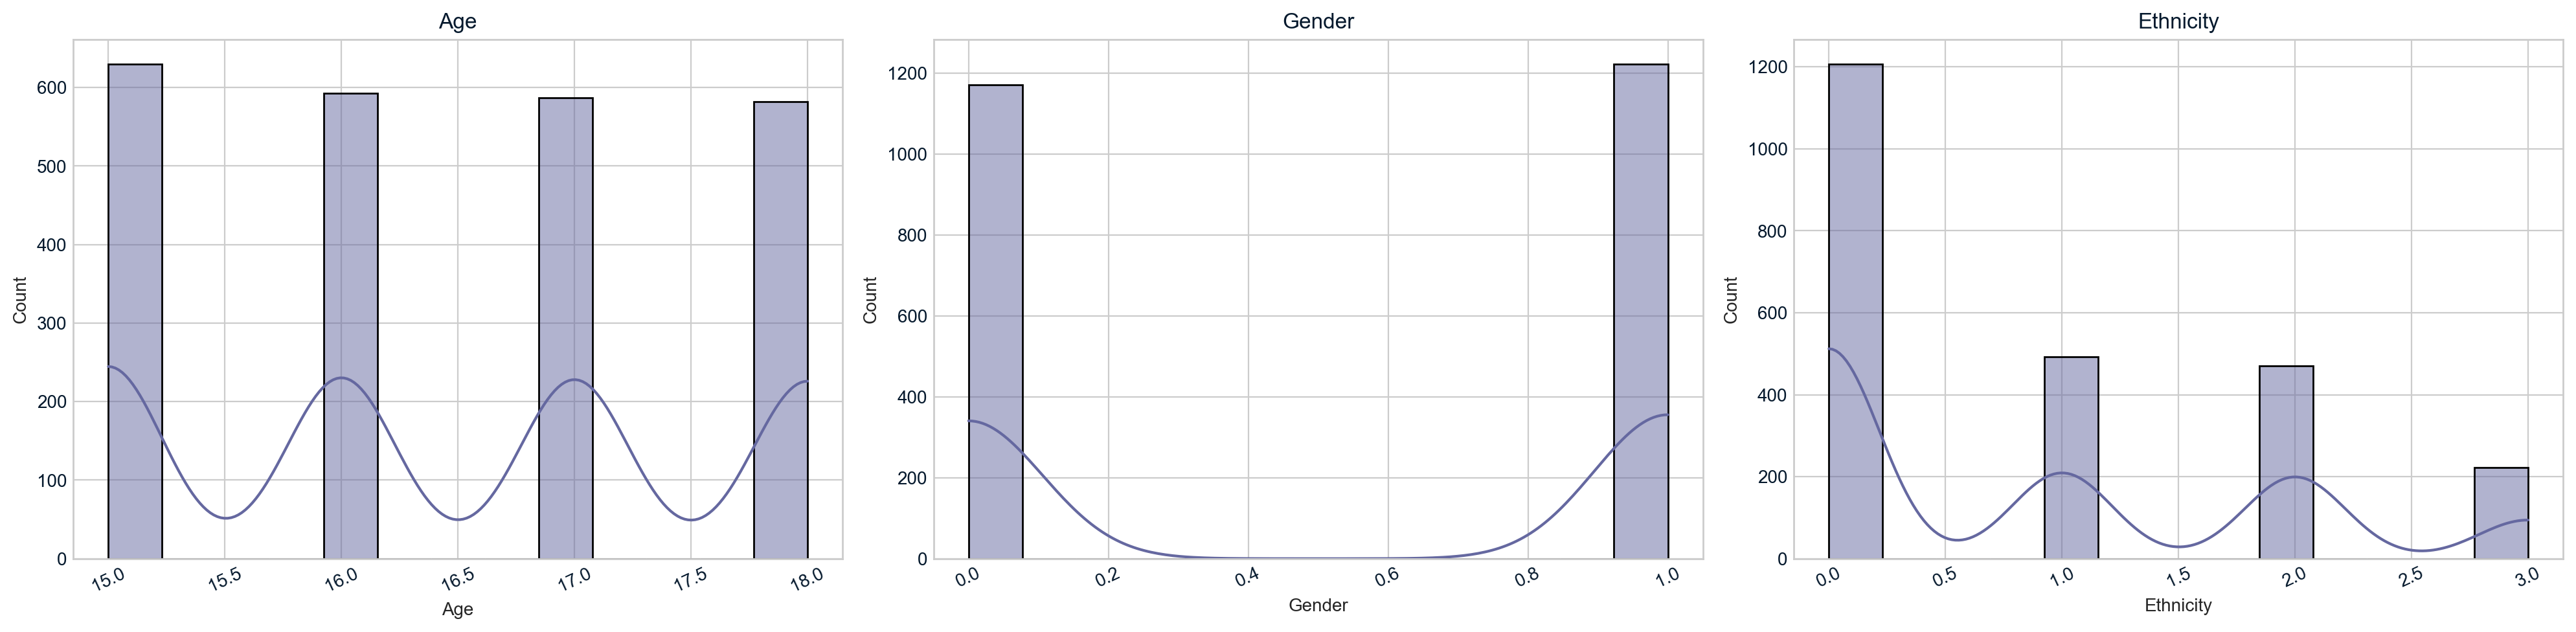

In [8]:
distribution(students, ["Age", "Gender", "Ethnicity"])

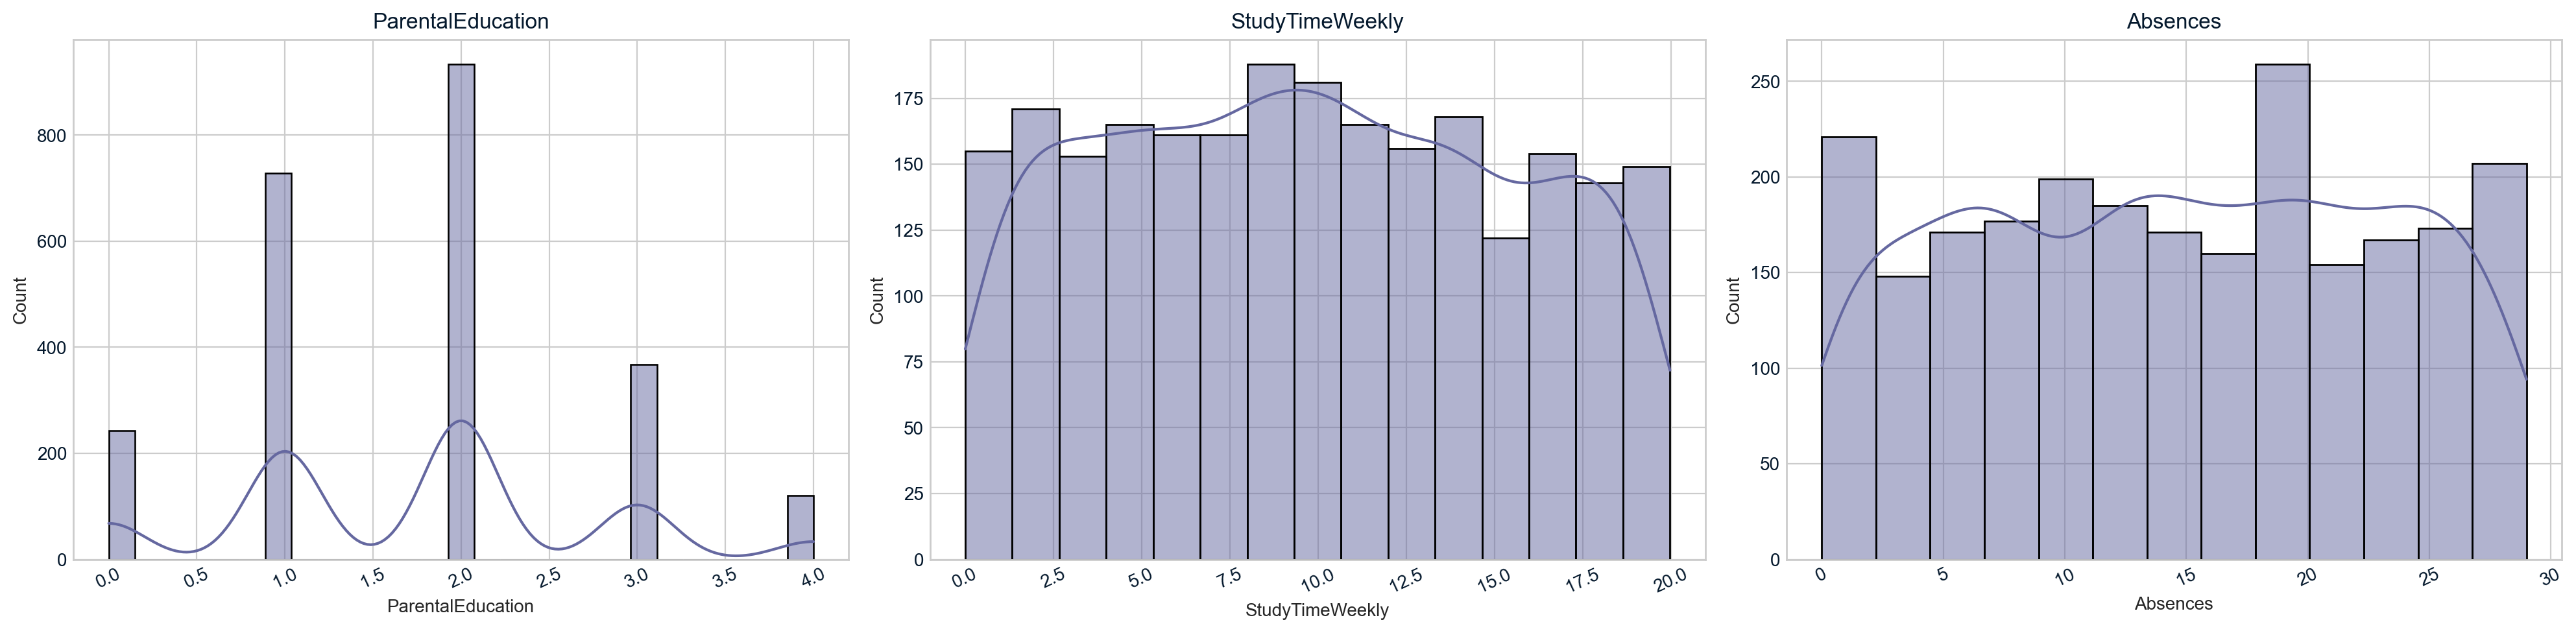

In [9]:
distribution(students, ["ParentalEducation", "StudyTimeWeekly", "Absences"])

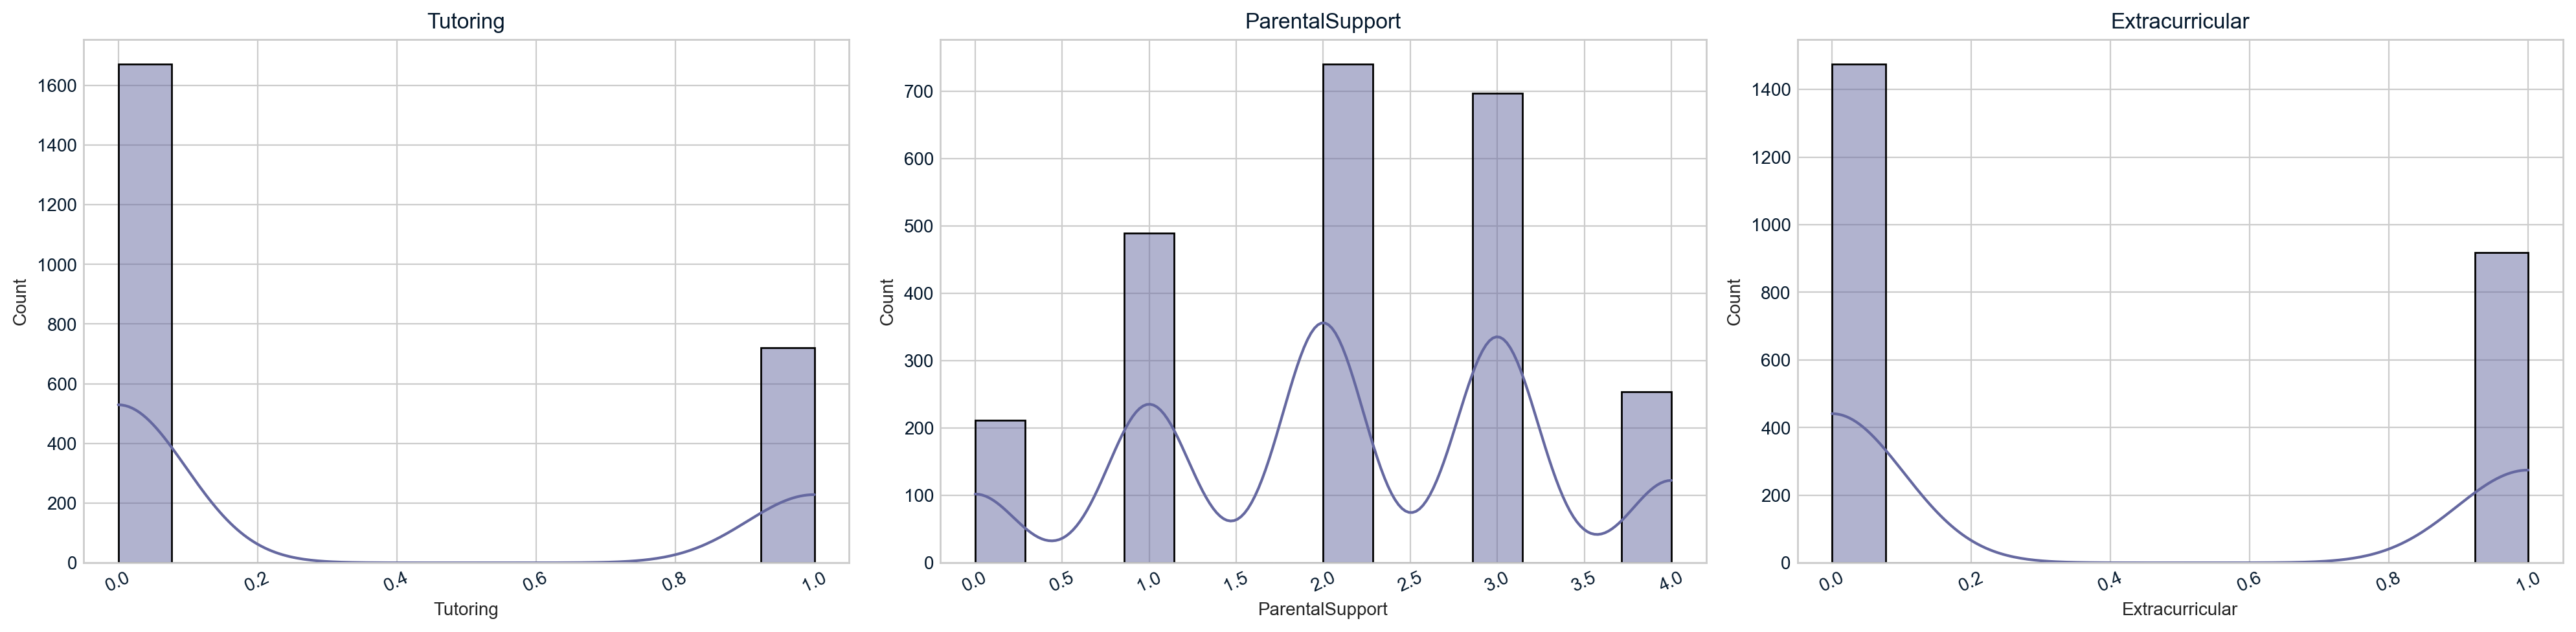

In [10]:
distribution(students, ["Tutoring", "ParentalSupport", "Extracurricular"])

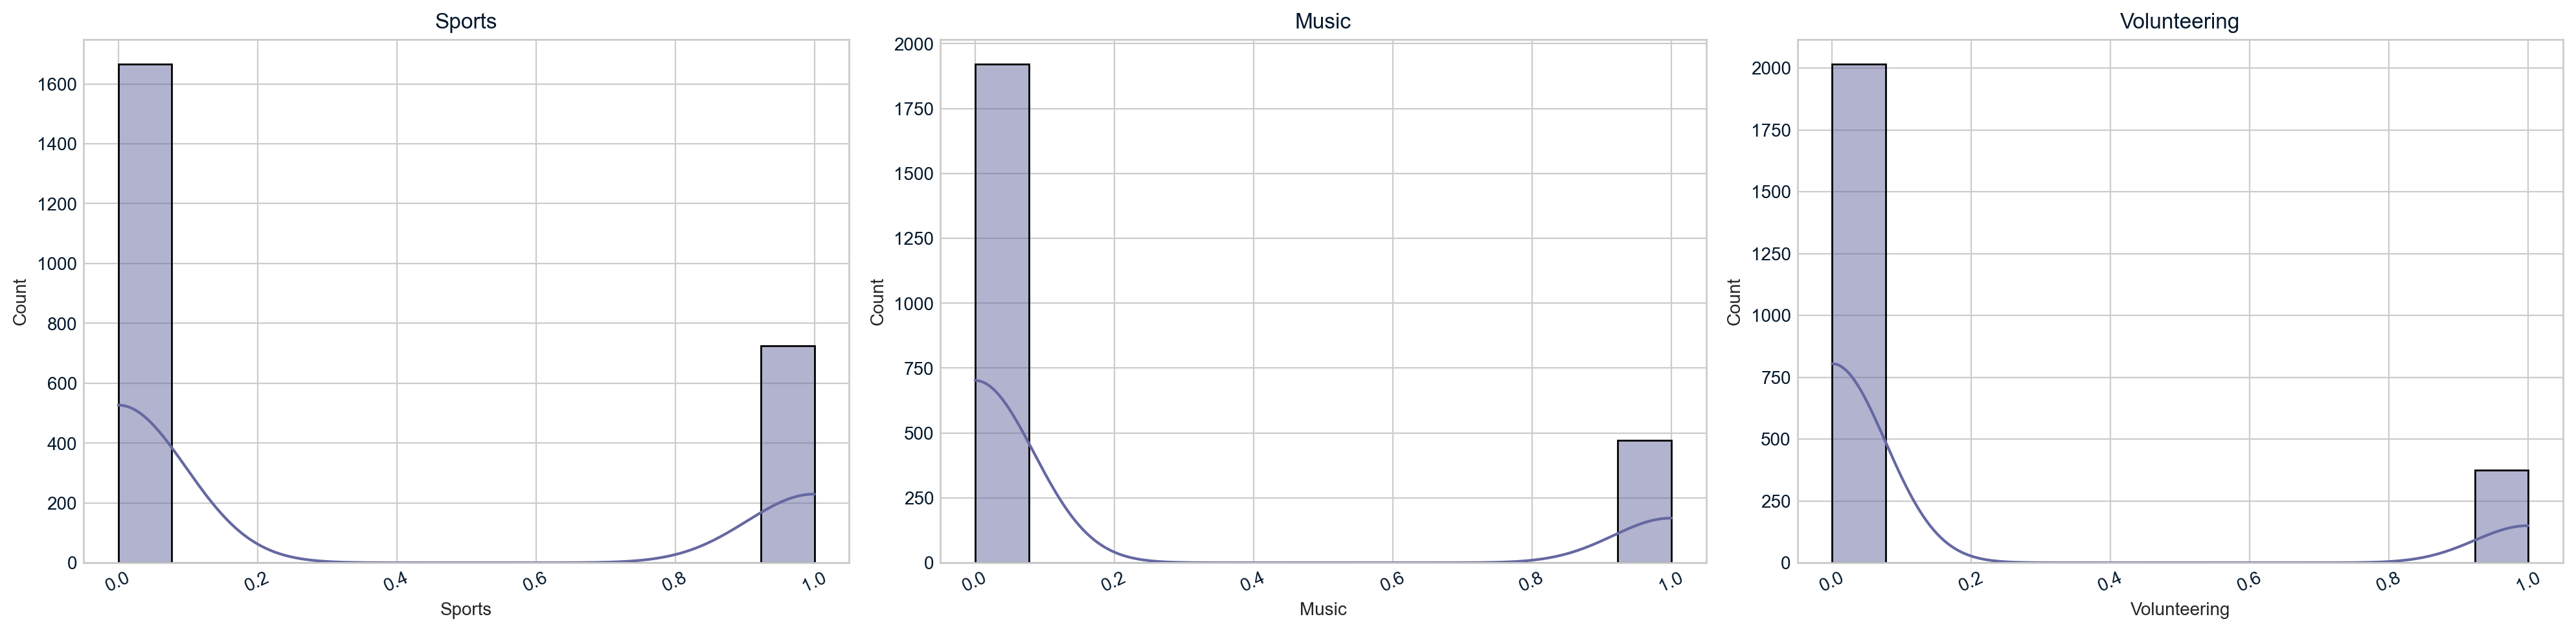

In [11]:
distribution(students, ["Sports", "Music", "Volunteering"])

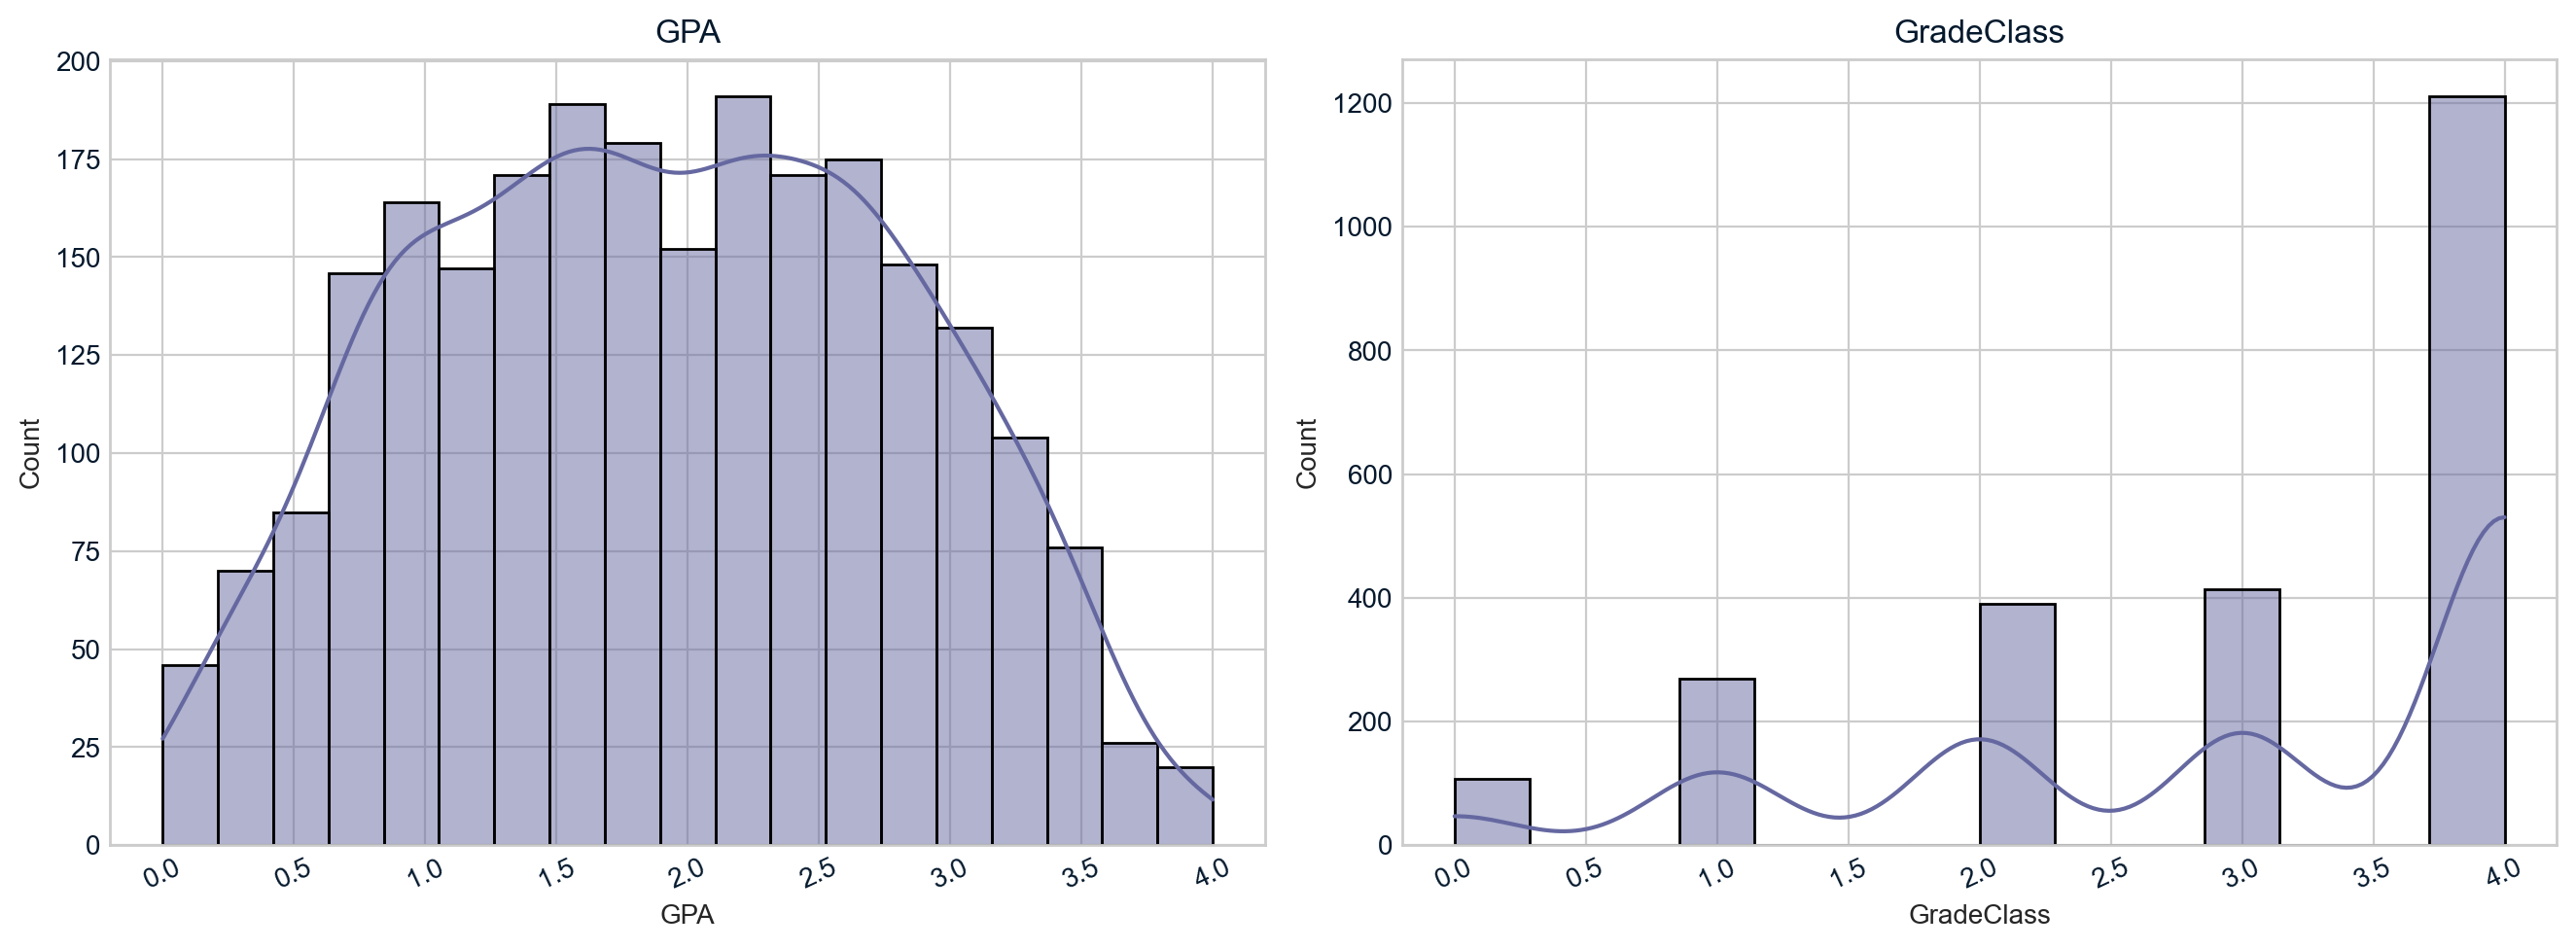

In [12]:
distribution(students, ["GPA", "GradeClass"])

The GradeClass variable exhibits a right-skewed distribution, indicating a class imbalance with an overrepresentation of lower grade classes

### Correlation Matrix

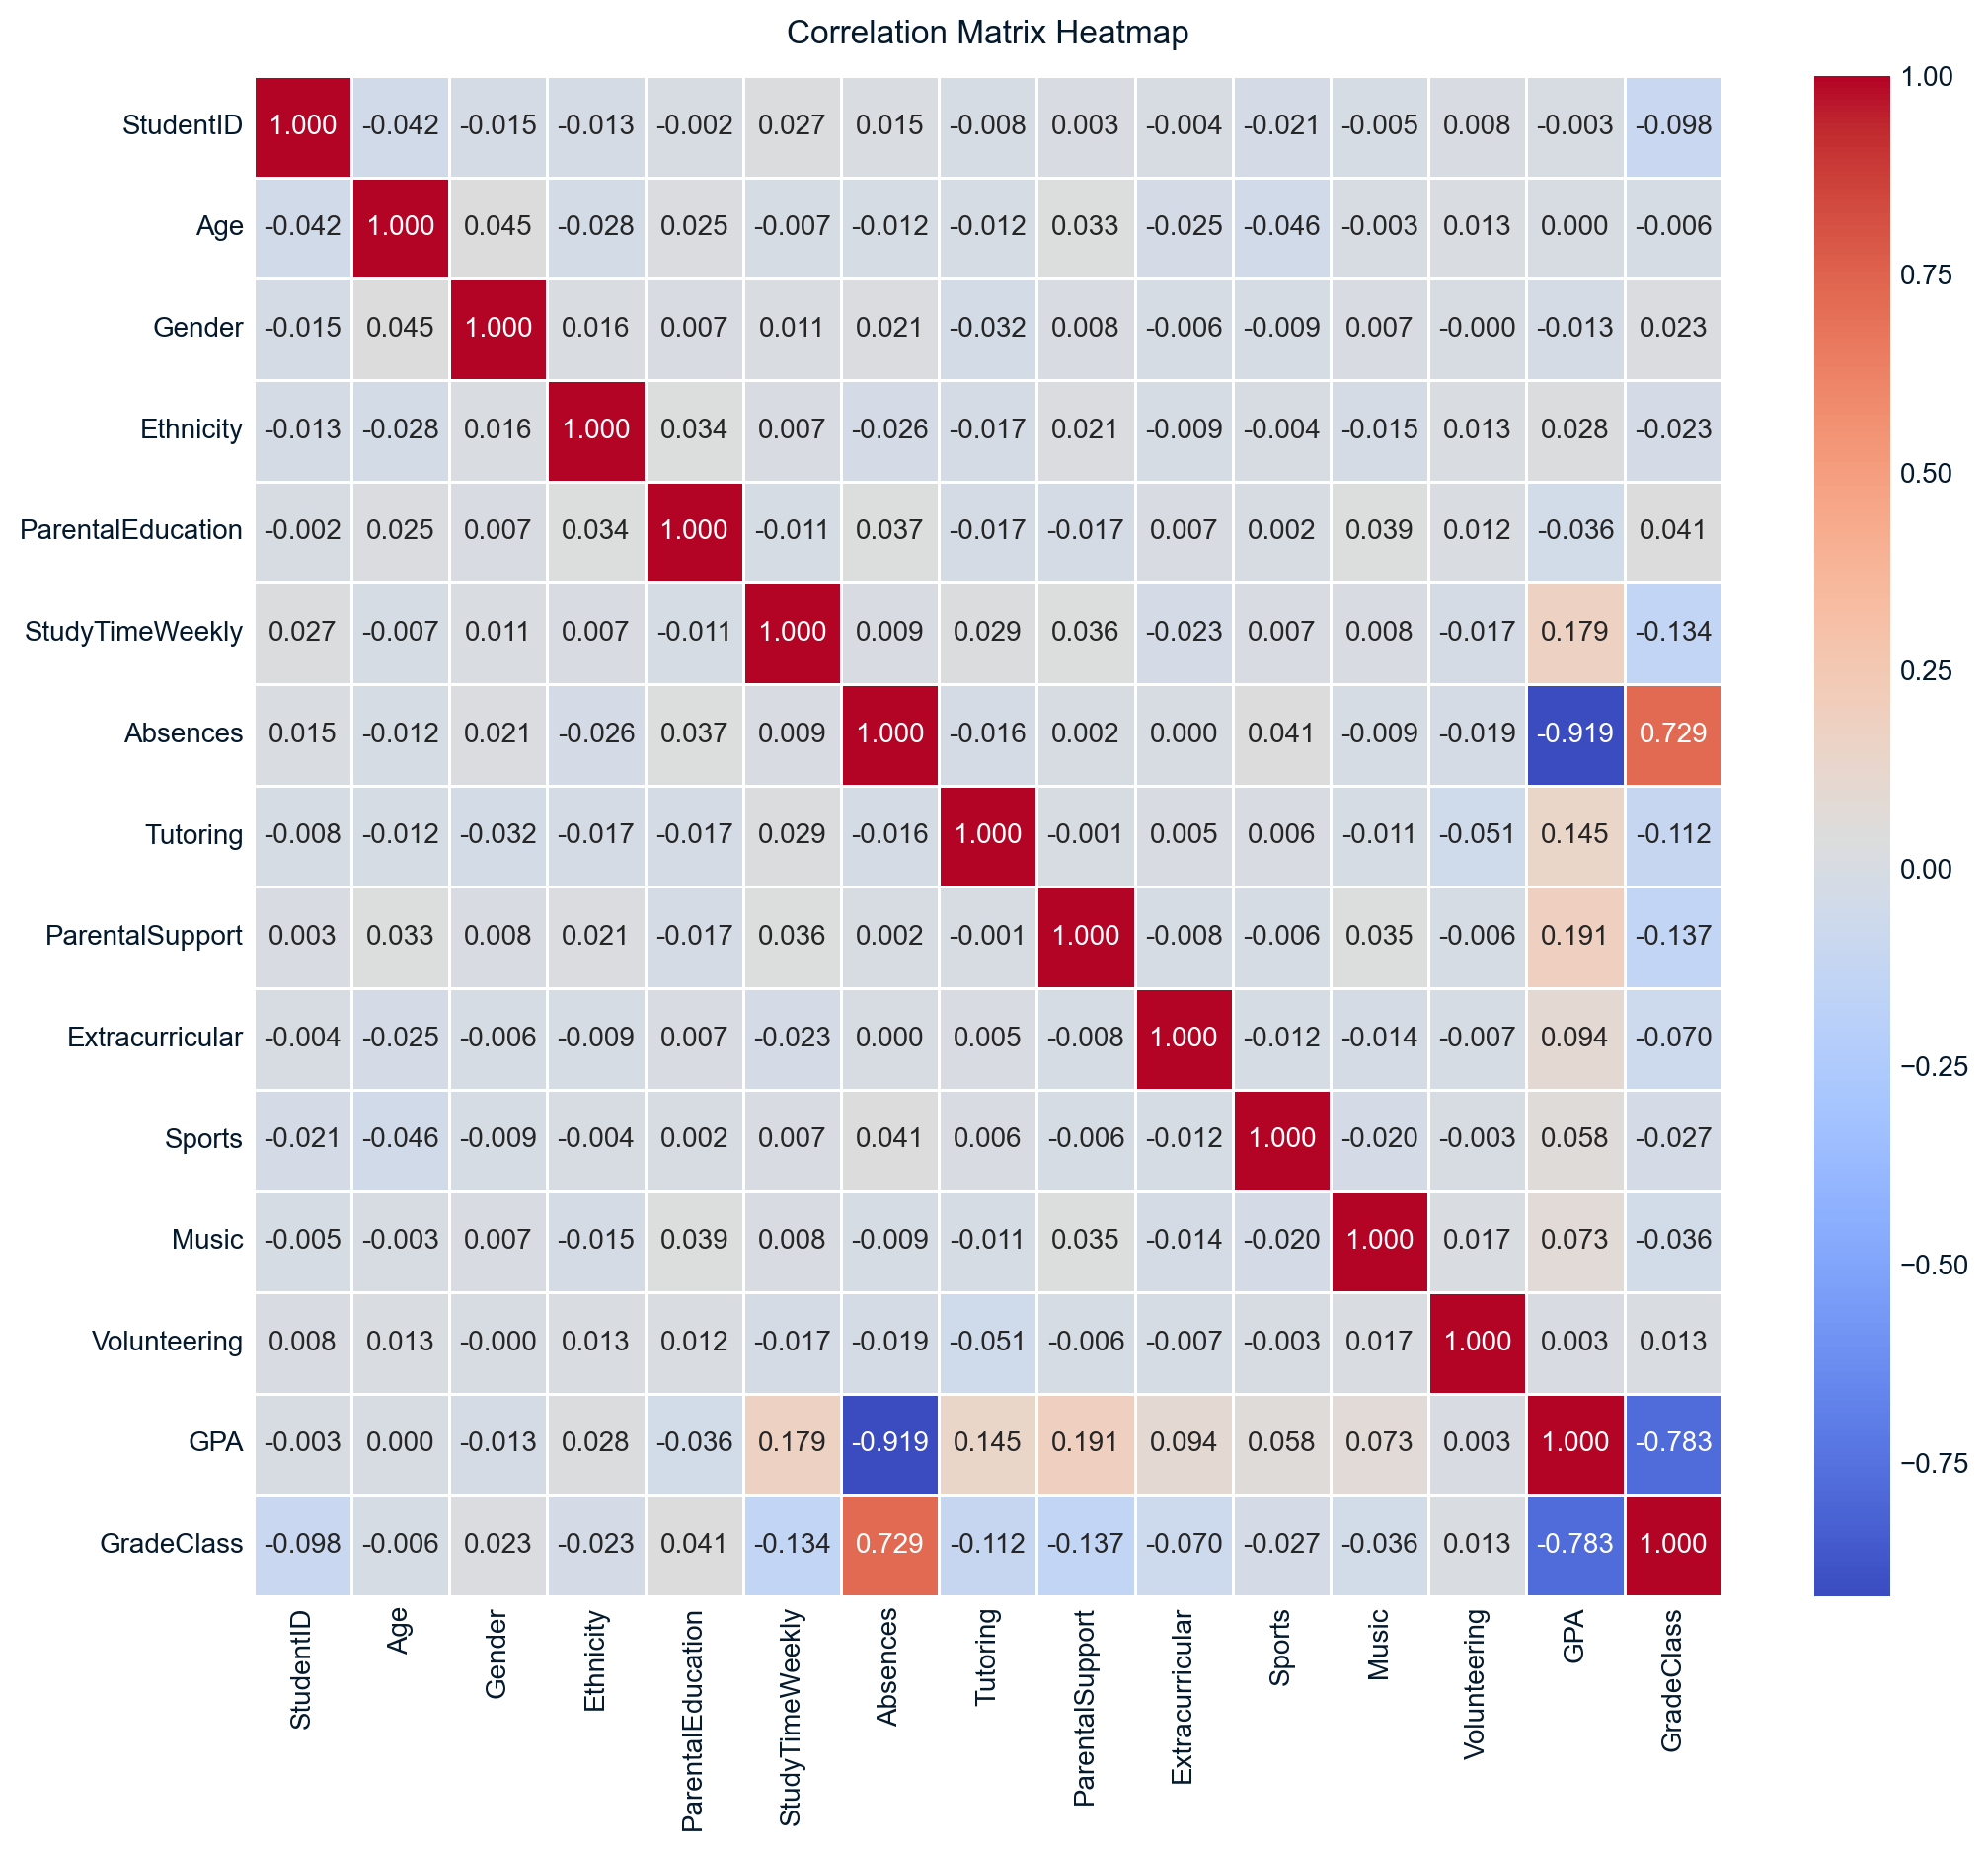

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(students.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.show()

Absences and GPA have a very strong negative correlation coefficient of **-0.919**. This indicates that students with higher absence rates tend to have lower GPAs, which is unsurprising.

This matrix/heatmap provides a valuable starting point for understanding the relationships between different variables in your student data.

## Data Clearning and Preprocessing

- Define mappings for categorical variables like `Ethnicity`, `ParentalEducation`, `Tutoring`, `ParentalSupport`, `Extracurricular`, `Activities`, `Sports`, `Music`, and `Volunteering` to convert numerical codes into descriptive labels

In [14]:
ethnicity = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parental_education = {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher'}
tutoring = {0: 'No', 1: 'Yes'}
parental_support = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
extracurricular = {0: 'No', 1: 'Yes'}
sports = {0: 'No', 1: 'Yes'}
music = {0: 'No', 1: 'Yes'}
volunteering = {0: 'No', 1: 'Yes'}
gender = {0: 'Male', 1: "Female" }

- Create a copy of the dataset, assign it to a variable

In [15]:
students_copy = pd.read_csv(dataset_url)

- Iterating through specified columns and replacing numerical values with corresponding descriptive labels using the created mapping dictionaries

In [16]:
students_copy['Ethnicity'] = students['Ethnicity'].map(ethnicity)
students_copy['ParentalEducation'] = students['ParentalEducation'].map(parental_education)
students_copy['Tutoring'] = students['Tutoring'].map(tutoring)
students_copy['ParentalSupport'] = students['ParentalSupport'].map(parental_support)
students_copy['Extracurricular'] = students['Extracurricular'].map(extracurricular)
students_copy['Sports'] = students['Sports'].map(sports)
students_copy['Music'] = students['Music'].map(music)
students_copy['Volunteering'] = students['Volunteering'].map(volunteering)
students_copy['Gender'] = students['Gender'].map(gender)

- Display the new DataFrame, first five (5) rows

In [17]:
students_copy.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,1.0
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,4.0
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,3.0
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,4.0


## Data Visualization II

### Analysis of Factors Influencing GPA

This analysis explores the relationship between various factors and students' GPA.

- List all columns to analyze

In [18]:
columns_to_analyze = ["Age", "StudyTimeWeekly", "Absences", "ParentalEducation", 
                       "Tutoring", "ParentalSupport", "Extracurricular", 
                       "Sports", "Music", "Volunteering"]

- Use scatter plots with regression lines to examine individual relationships between each factor and GPA

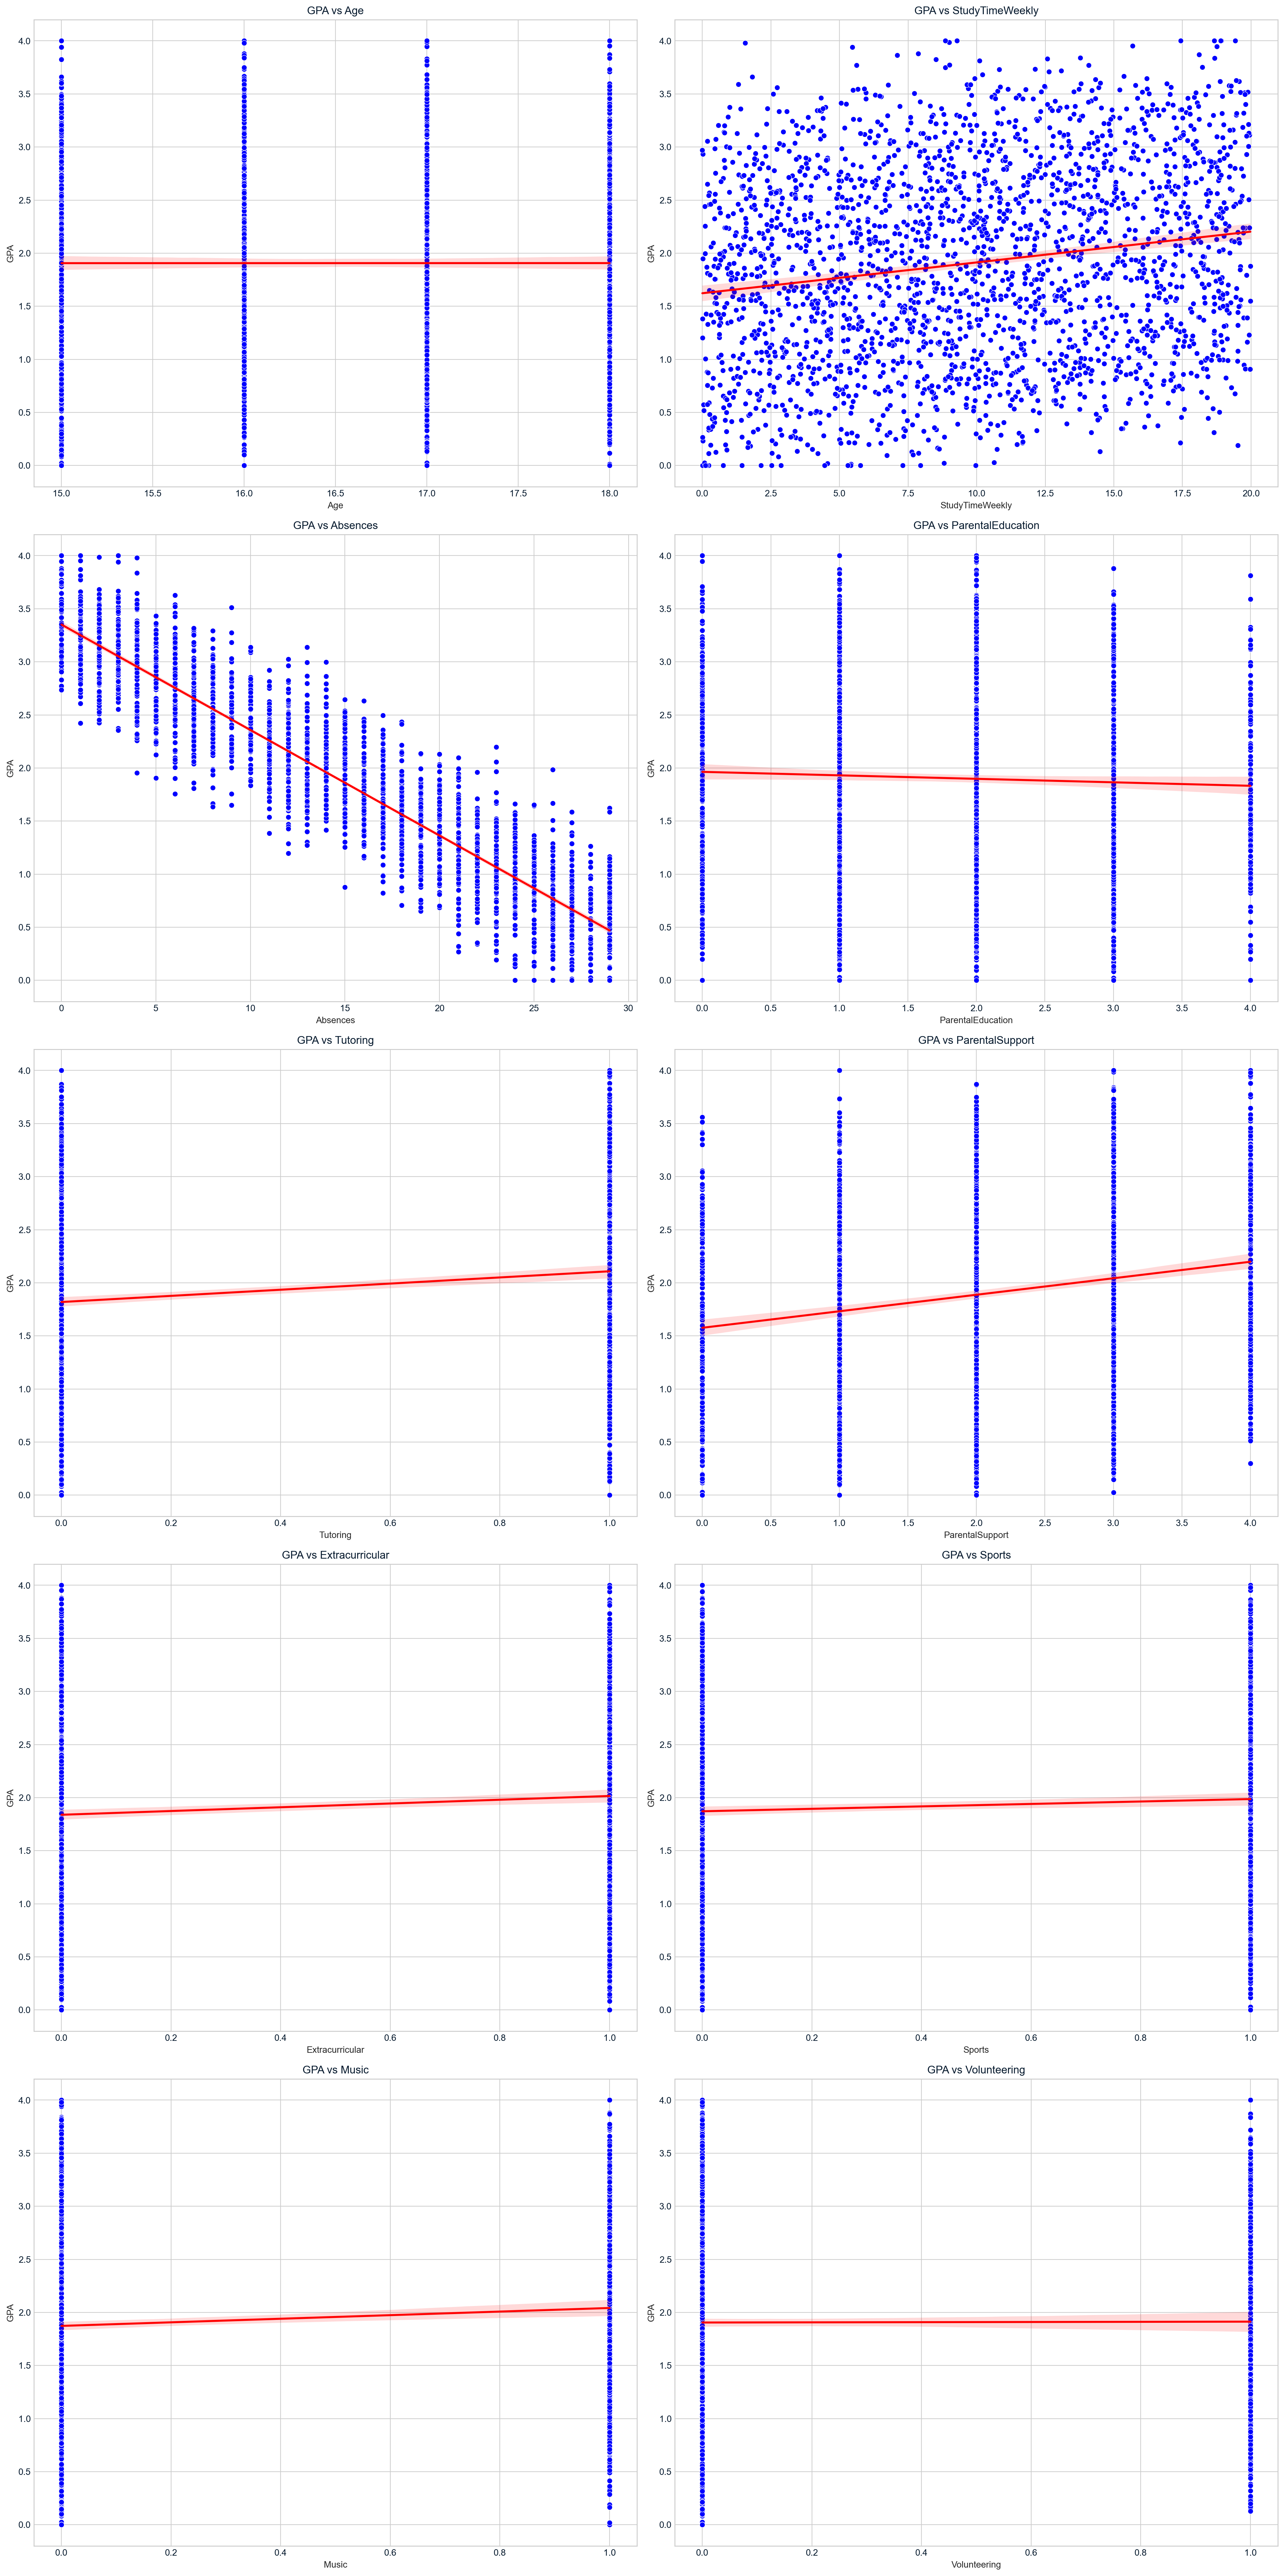

In [19]:
plt.figure(figsize=(20, 40))

num_columns = 2
num_rows = (len(columns_to_analyze) + num_columns - 1) // num_columns

for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.scatterplot(data=students, x=column, y='GPA', color='blue')
    sns.regplot(data=students, x=column, y='GPA', scatter=False, color='red')
    plt.title(f'GPA vs {column}')
    plt.xlabel(column)
    plt.ylabel('GPA')

plt.tight_layout()
plt.show()

The provided scatterplots visualize the relationship between several factors and GPA.

So here are the key findings:   
- `StudyTimeWeekly` has a clear negative correlation is evident, suggesting that increased study time is generally associated with higher GPAs.
- `Absences` has a strong negative correlation exists, indicating that a higher number of absences tends to correlate with lower GPAs.
- While `Tutoring`, `ParentalSupport`, `Extracurricular`, `Sports`, `Music`, and `Volunteering`, these factors exhibit minimal to no apparent correlation with GPA based on the scatterplots.

Preliminary analysis indicates that `StudyTimeWeekly` and `Absences` are potential predictors of GPA. 

### Analysis of GPA by Ethnicity with Age and Gender Categories

This analysis visualizes the impact of ethnicity on GPA while categorizing by age and gender.

Purpose of doing this analysis is when analyzing GPA in the context of ethnicity, age, and gender provides a more nuanced understanding of academic performance. It helps identify if certain demographic factors contribute to GPA disparities, which can inform targeted interventions or support strategies to address educational inequalities. By visualizing these relationships, we can gain insights into how different factors interact and impact student performance.

- GPA according to Ethnicity categorized by Age

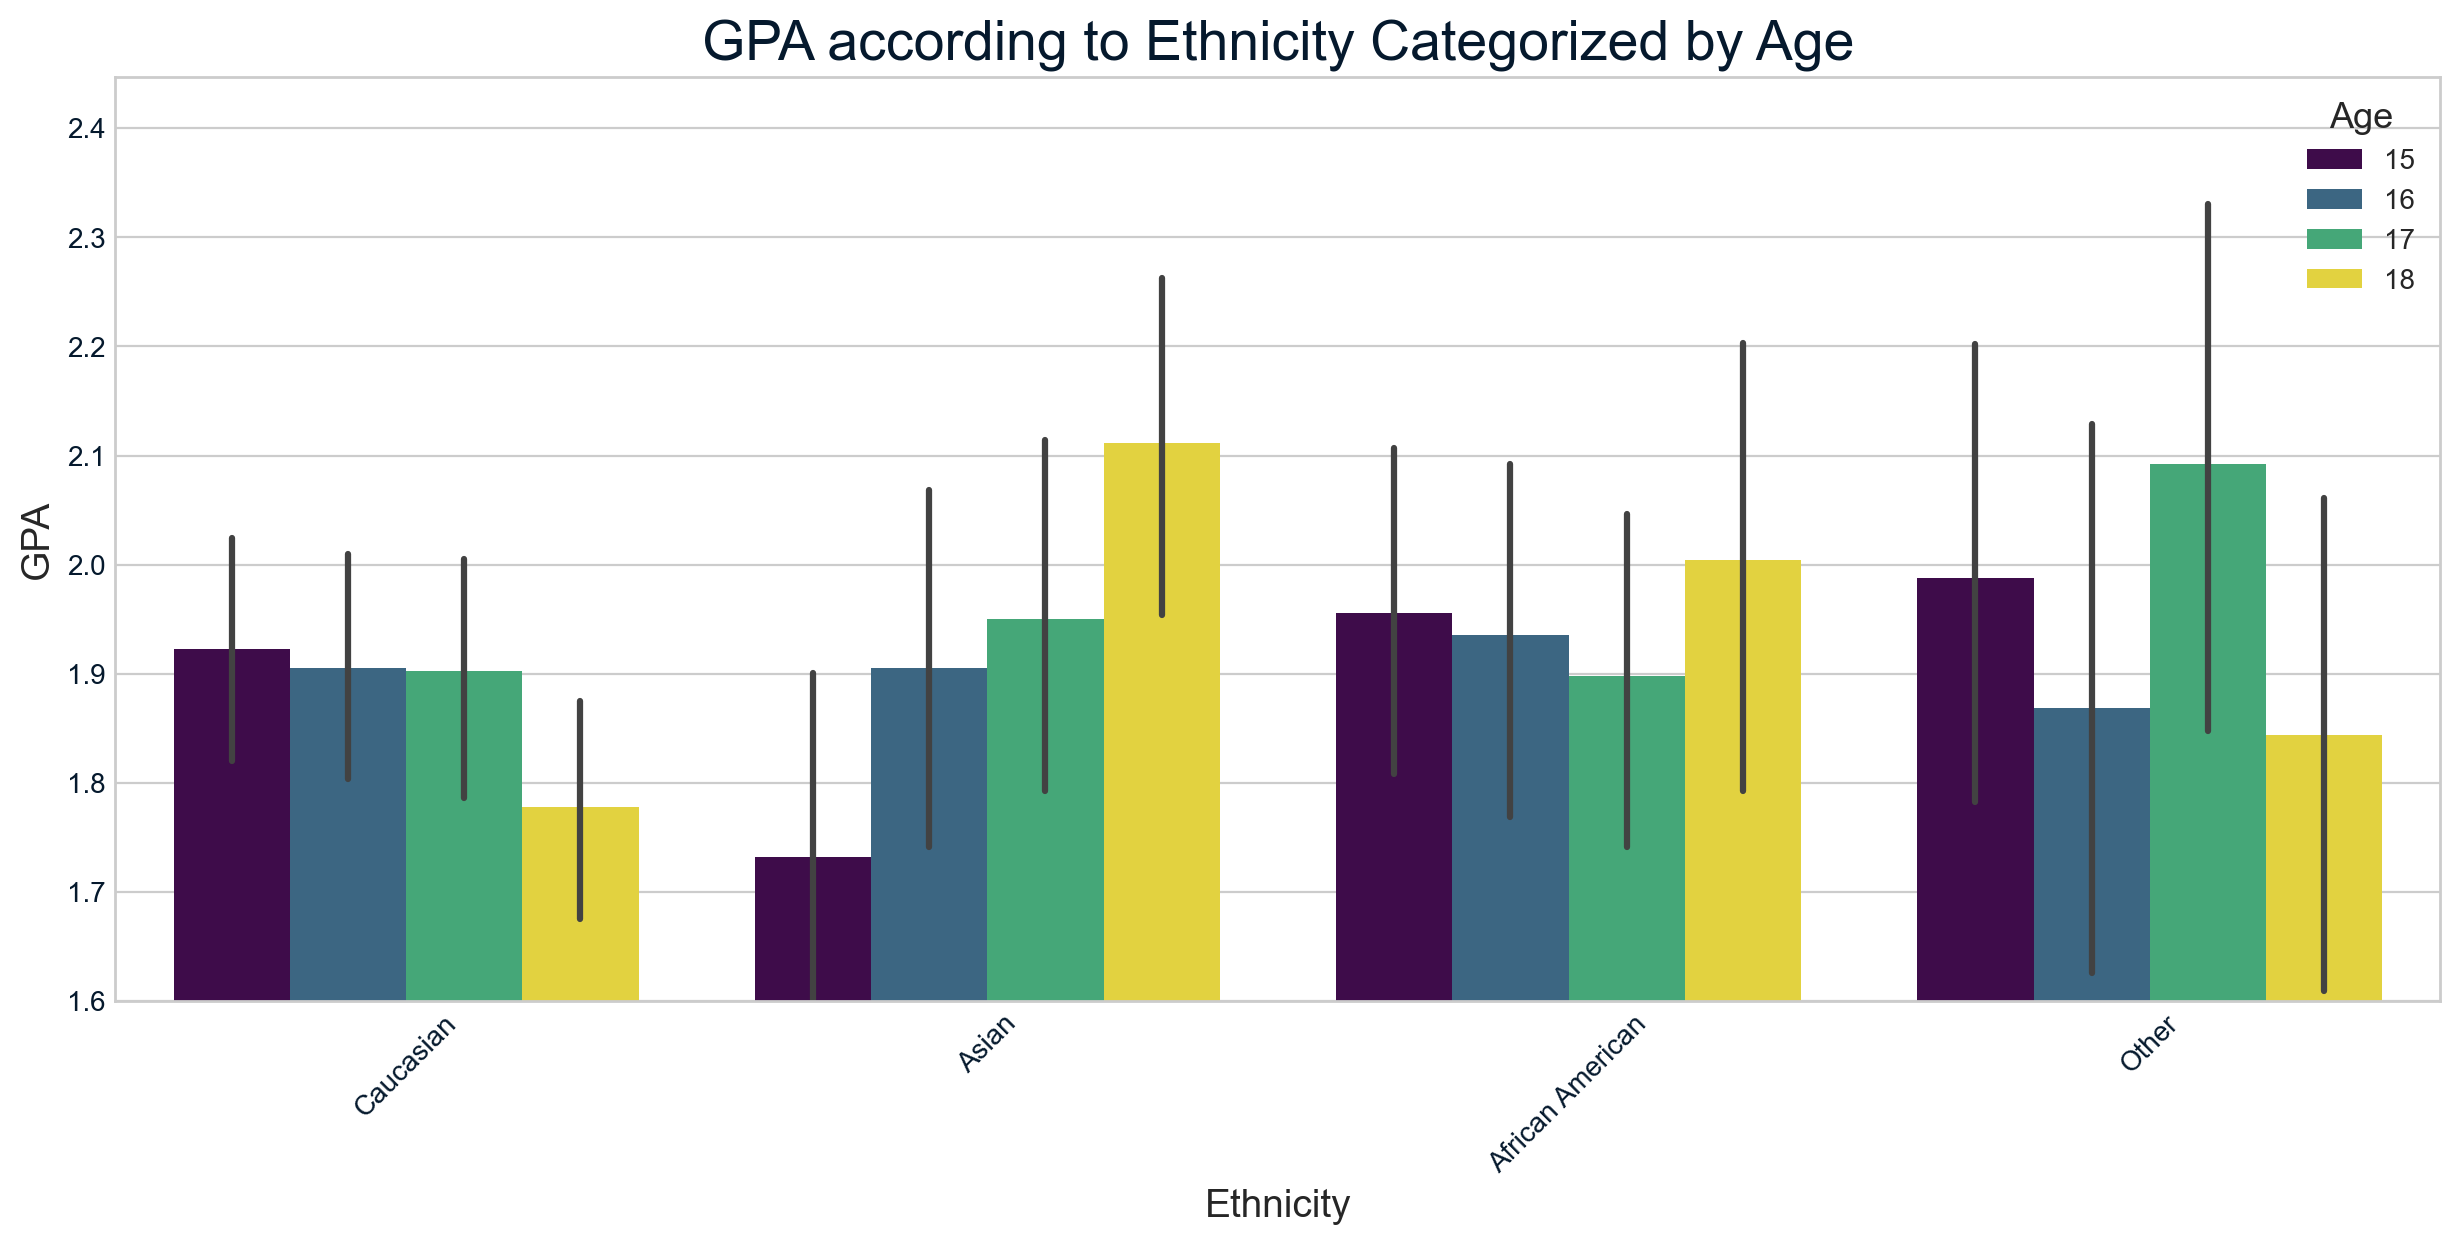

In [20]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Ethnicity', y='GPA', hue='Age', data=students_copy, palette='viridis')
plt.ylim(bottom=1.6)  # Adjust y-axis to better visualize GPA range
plt.title("GPA according to Ethnicity Categorized by Age", fontsize=20)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.legend(title='Age', title_fontsize='13', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

A significant interaction effect exists between ethnicity and age on GPA. GPA exhibits substantial heterogeneity across ethnic and age cohorts. Notably, Asian students consistently outperform other groups across all age brackets, followed by Caucasian students. Conversely, African American and Other ethnicities demonstrate lower average GPAs.
- GPA according to Ethnicity categorized by Gender

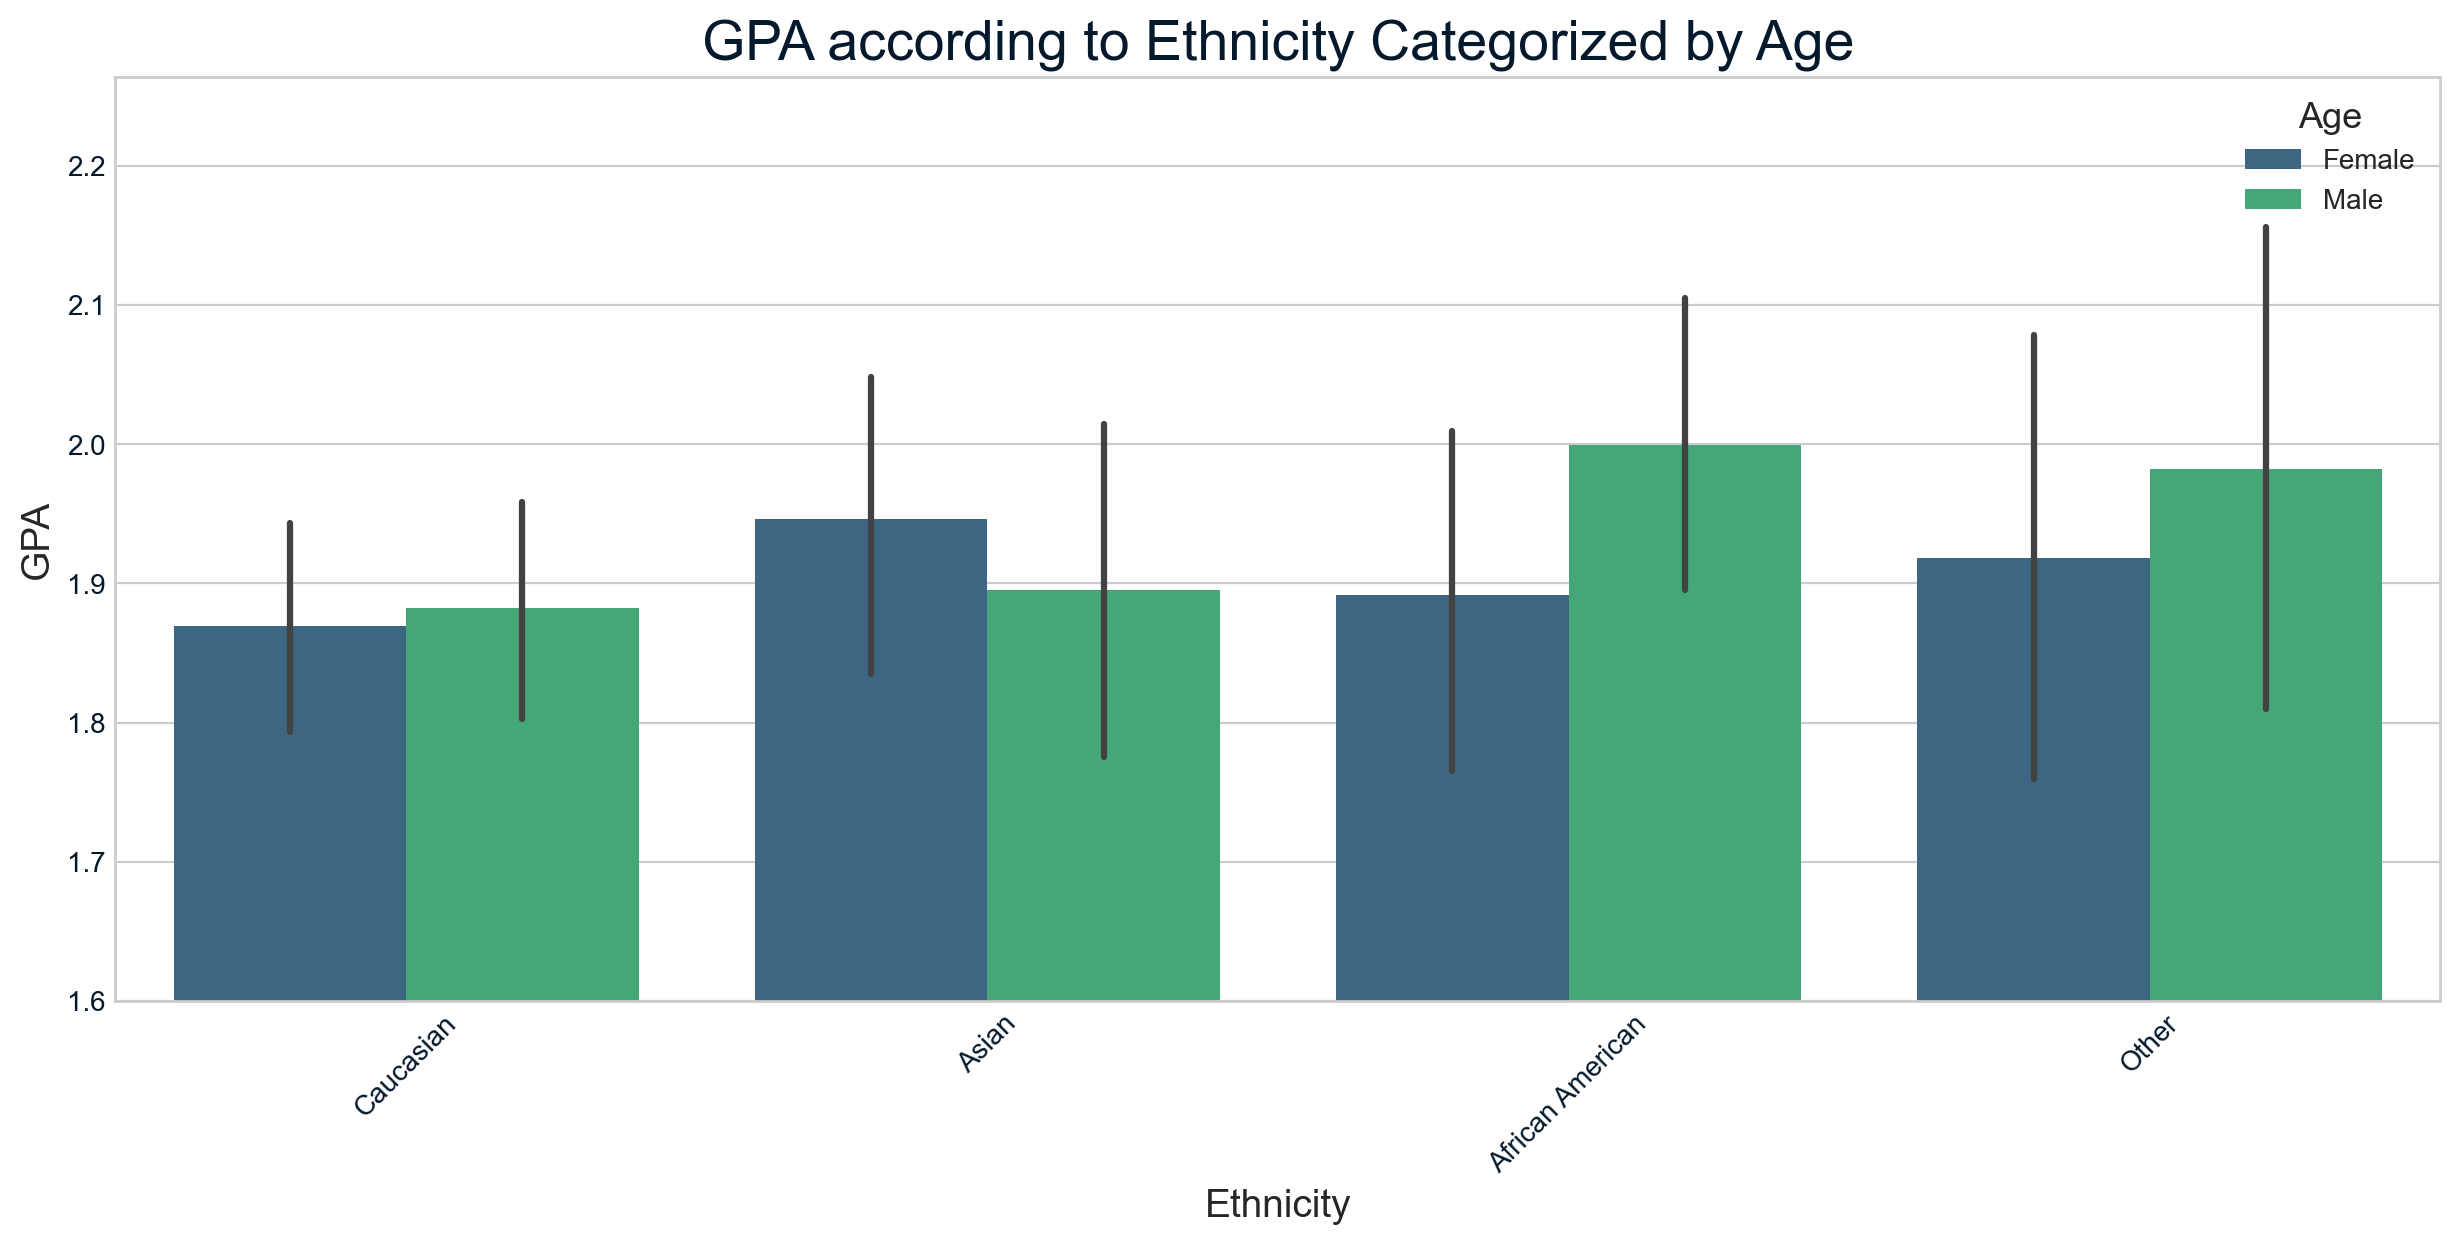

In [21]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Ethnicity', y='GPA', hue='Gender', data=students_copy, palette='viridis')
plt.ylim(bottom=1.6)  # Adjust y-axis to better visualize GPA range
plt.title("GPA according to Ethnicity Categorized by Age", fontsize=20)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.legend(title='Age', title_fontsize='13', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

A clear gender gap is evident, with male students consistently outperforming female students across all ethnicities.